Multi Layer Perceptron
======================

Carga de dataset FashionMNIST

# New Section

In [1]:
import torch
from torch.utils.data import random_split
import torchvision
from torchvision import transforms
import pickle
from pathlib import Path
import numpy as np

def save(data, path):
  databytes = pickle.dumps(data)
  path.write_bytes(databytes)


def load(path):
  databytes = path.read_bytes()
  datab = pickle.loads(databytes)
  return data

Se descargan los dataset y se definen dos conjuntos: entrenamiento y prueba.

In [2]:
transform =  transforms.Compose(
  [transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]
)

trainset = torchvision.datasets.FashionMNIST(
    root='./data', 
    train=True, 
    download=True,  
    transform=transform)


evalset = torchvision.datasets.FashionMNIST(
    root='./data', 
    train=False,
    download=True, 
    transform=transform)
    


In [3]:
print(trainset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [4]:
trainset[0][0].shape


torch.Size([1, 28, 28])

In [5]:
val_percent = 0.5
val_len = int(len(evalset)*val_percent)
valset, testset = random_split(evalset, [val_len, len(evalset)-val_len])

# Pruebas de algoritmos de optimización

Todos estos métodos utilizas como base método del gradiente.

In [6]:
from torch import optim

accuracy = 0.95

In [7]:
# Uso de momentum
beta = 0.9

## Se definen 4 arquitecturas para entrenar


1.-  MLP 2 capas

2.-  MLP 2 capas con dropuot = 0.3

3.-  CNN

4.-  CNN con regularizacion L2 (alpha/2= 0.001)

Se debe estudiar el cambio de la función de costo durante el entrenamiento. Mostrando el cambio en cada época.

Responder:
¿Qué se puede decir sobre las diferentes regulariaciones? ¿Qué diferencias se observan entre utilizar una red convolucional y un MLP?

Escoger la cantidad de épocas para cada modelo. Escoger el mejor modelo a partir de test y analizar resultado en base a la matriz de confusión para tal modelo.

In [8]:
from model_nn import CNN, MLP

In [23]:
from torch.utils.data import DataLoader

BATCH_SIZE = 128

train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

DEVICE = 'cuda' if torch . cuda . is_available () else 'cpu'

In [24]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

torch.Size([1, 28, 28])


<Figure size 1080x360 with 20 Axes>

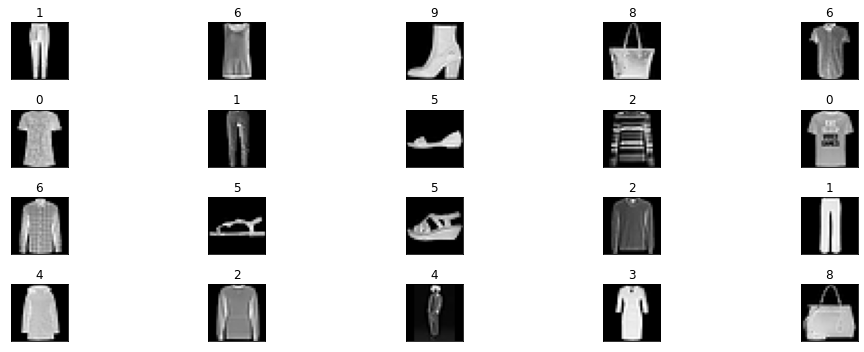

In [34]:
# obtener tamaño de la imagen de cada elemento del dataset.
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))

print(images[0].shape)
d,w,h = images[0].shape
fig = plt.figure(figsize=(15,5))

for idx in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(labels[idx].item())
fig.tight_layout()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

<Figure size 1080x1440 with 1 Axes>

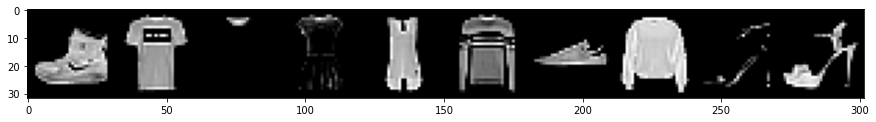

In [13]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")


# Tamaño de capa 1
La primera capa debe coincidir con las 'features' que se le están entregando, en este caso es una imagen cuyo equivalente son las 'columnas'.


In [38]:
# red a considerar, MLP standar
from model_nn import CNN, MLP

depth, rows, cols = images[0].shape
first = rows * cols
print("First layer", first)
layers = [first,256]
clases =  10
size = (432,288)
net = MLP(n_classes=clases, layers=layers)

First layer 784


In [39]:
# Parametros de optimizacion
# se usa CEL para que en la salida la evaluación ocupe softmax multiclase
criterion = torch . nn . CrossEntropyLoss ()
# Learning rate
lr = 0.001
epochs = 60

In [40]:
print(list(net.parameters()))

[Parameter containing:
tensor([[ 0.0159,  0.0168,  0.0091,  ...,  0.0111,  0.0023,  0.0210],
        [-0.0337,  0.0302,  0.0140,  ..., -0.0092,  0.0137,  0.0092],
        [-0.0354,  0.0058, -0.0248,  ..., -0.0260, -0.0320, -0.0093],
        ...,
        [ 0.0264, -0.0331, -0.0049,  ..., -0.0143,  0.0091,  0.0139],
        [ 0.0106, -0.0311, -0.0207,  ...,  0.0352, -0.0199,  0.0273],
        [-0.0154, -0.0306, -0.0293,  ..., -0.0309,  0.0240, -0.0320]],
       requires_grad=True), Parameter containing:
tensor([ 0.0319,  0.0313,  0.0082,  0.0218, -0.0109, -0.0085,  0.0263, -0.0335,
        -0.0240, -0.0308, -0.0211, -0.0307, -0.0189,  0.0174,  0.0197,  0.0072,
        -0.0188,  0.0223,  0.0190, -0.0320,  0.0136, -0.0329,  0.0098,  0.0237,
         0.0224,  0.0151, -0.0211, -0.0267,  0.0025, -0.0009,  0.0307, -0.0074,
        -0.0248, -0.0259, -0.0190,  0.0276,  0.0176, -0.0052, -0.0056,  0.0239,
        -0.0031,  0.0072, -0.0318, -0.0342, -0.0352, -0.0175,  0.0030,  0.0259,
         0.01

In [17]:
# El optimizador escogido en la parte b , el siguiente es solo un ejemplo
# sin regularizacion weight_decay
betas = ( 0.9, 0.999 )
optimizer = torch . optim . Adam ( net . parameters () , lr = lr , betas=betas)

In [18]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [41]:
def eval_net(net,dataset,device,perdida):
    # No necesitamos crear el grafo computacional
    with torch.no_grad():
        X, Y = dataset.tensors[0].to(device), dataset.tensors[1].to(device)  
        # Predecimos con la red
        Y_PRED = net.forward(X)
        Y_PRED = torch.flatten(Y_PRED)  
        # Calculamos la loss en entrenamiento
        loss = perdida(Y_PRED, Y)  
        # Encontramos la clase predecida
        Y_PRED_BIN = (Y_PRED >= 0.5).float()  
        # Cantidad de predicciones correctas
        correctos = torch.sum(Y_PRED_BIN == Y).item()  
        # Guardamos la precisión para tal epoca
        accuracy = (correctos / len(Y)) * 100
        return loss.item(), accuracy

In [42]:
from torch.optim import Optimizer
from torch import nn
from torch.utils.data import DataLoader
import time
import sys

def fit_net(
    train_dataset, 
    test_dataset, 
    dataloader:DataLoader,
    loss: nn.CrossEntropyLoss,
    optimizer: Optimizer,
    net:nn.Module, 
    epochs:int, 
    run_in_GPU:bool=True, 
    reports_every:int=1, 
    cheq_grad:bool=False):
    # activar uso de GPU
    device  = 'cuda' if run_in_GPU else 'cpu'
    # conectar red a dispositivo
    net.to(device)
    # activate to train
    net.train()
    # mostrar red
    print("Red", net)
    tiempo_epoch = 0
    for e in range(1, epochs+1):
        inicio_epoch= time.process_time()
        for (images,labels) in dataloader:
            # optmizador a 0, limpiiando gradientes
            optimizer.zero_grad()            
            # Aseguramos de pasarlos al dispositivo elegido
            images, labels = images.to(device), labels.to(device)

            # Aplicamos la pasada hacia adelante de la red
            labels_pred = net.forward(images)

            # Función de perdida
            L = loss(torch.flatten(labels_pred),labels)

            # Calculamos los gradientes (backpropagation)
            L.backward()

            # Actualizamos los parámetros con descenso del gradiente
            optimizador.step()

            # Dejamos en 0 a los gradientes
            optimizador.zero_grad()    
            
        tiempo_epochs += time.process_time() - inicio_epoch

        # Terminada la época, calculamos la loss, y el acurracy en train y test
        train_loss, train_acc = eval_net( net, train_dataset, device, perdida )
        test_loss, test_acc = eval_net( net, test_dataset, device, perdida )
        # salida
        sys.stdout.write(
            '\rEpoch:{0:03d}'.format(e) + ' Train_Acc:{0:.2f}%'.format(train_acc)
            + ' Train_Loss:{0:.4f}'.format(train_loss)
            + ' Test_Acc:{0:.2f}%'.format(test_acc)
            + ' Test_Loss:{0:.4f}'.format(test_loss) 
                + ' Tiempo/epoch:{0:.3f}s'.format(tiempo_epochs/e))           
    print("Saving model")    
    torch.save(net.state_dict(), "MLP.model")

La siguiente acción sera llamar a la función definida para entrenar la red.

In [43]:
fit_net(
    trainset,
    valset, 
    train_loader,
    criterion,# loss criteria cross correlation
    optimizer,
    net, # red entrenada
    epochs=epochs, 
    run_in_GPU=False)

Red MLP(
  (steps): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=10, bias=True)
  )
)


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 256] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:136